Apropriate Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt 

Overview Idea: 

Make a data fram of prices for items over timer. Items will be columns headers, days as rows, and entries as average price on day

Import data

In [5]:
df = pd.read_csv('osrs_prices.csv')

First Month: April 2021

In [7]:
items = [560,561,562,565]
prices = pd.DataFrame()
timestamps = False
for i in items:
    filtered_rows = df[df.iloc[:,0] == i]
    filtered_rows = filtered_rows.reset_index(drop=True)
    prices[i] = (filtered_rows.iloc[:729,2]*filtered_rows.iloc[:729,3]+filtered_rows.iloc[:729,4]*filtered_rows.iloc[:729,5])/(filtered_rows.iloc[:729,5]+filtered_rows.iloc[:729,3])


In [8]:
print(prices)

            560         561        562         565
0    190.986114  184.231637  44.375850  376.471470
1    190.486487  183.178910  45.359512  379.473680
2    191.000000  182.586122  45.341787  380.003980
3    192.430150  181.593084  46.373343  381.049201
4    192.485708  182.534394  44.502418  381.528821
..          ...         ...        ...         ...
724  141.870340   90.842389  68.200844  197.053018
725  142.890576   92.422276  66.315284  197.113876
726  142.994600   93.414128  68.504927  197.102080
727  140.142581   91.757932  68.956725  197.126374
728  138.535402   90.485623  69.563304  197.188048

[729 rows x 4 columns]


In [9]:
returns_portfolio = prices.pct_change()

In [10]:
print(returns_portfolio)

          560       561       562       565
0         NaN       NaN       NaN       NaN
1   -0.002616 -0.005714  0.022167  0.007975
2    0.002696 -0.003236 -0.000391  0.001397
3    0.007488 -0.005439  0.022751  0.002751
4    0.000289  0.005184 -0.040345  0.001259
..        ...       ...       ...       ...
724  0.019674 -0.031221 -0.073712 -0.000560
725  0.007191  0.017392 -0.027647  0.000309
726  0.000728  0.010732  0.033019 -0.000060
727 -0.019945 -0.017730  0.006595  0.000123
728 -0.011468 -0.013866  0.008797  0.000313

[729 rows x 4 columns]


In [11]:
variance_matrix = returns_portfolio.cov()*365

In [12]:
pot_returns = []
pot_risk = []
pot_weights = []

num_assets = len(prices.columns)
num_portfolios = 100000

individual_returns = prices.pct_change().mean()
individual_returns

560   -0.000375
561   -0.000888
562    0.000803
565   -0.000829
dtype: float64

In [13]:
for i in range(num_portfolios):
    randomweights = np.random.random(4)
    randomweights = randomweights/ randomweights.sum()
    pot_weights.append(randomweights)
    returns = np.dot(randomweights, individual_returns)
    pot_returns.append(returns)
    risk = randomweights.transpose() @ variance_matrix @ randomweights
    risk = np.sqrt(risk)
    pot_risk.append(risk)

In [15]:
data = {'Retruns':pot_returns, 'Risks': pot_risk}

for counter, symbol in enumerate(prices.columns.to_list()):
    data[str(symbol),'weight'] = [w[counter] for w in pot_weights]

portfolios_v1 = pd.DataFrame(data)
portfolios_v1.head()

,Retruns,Risks,"(560, weight)","(561, weight)","(562, weight)","(565, weight)"
0,-0.000695,0.155454,0.131476,0.224571,0.053884,0.590068
1,-0.000216,0.181071,0.244261,0.349124,0.319997,0.086619
2,-0.000198,0.178806,0.210009,0.285103,0.338628,0.166260
3,-0.000793,0.159889,0.097537,0.442160,0.010982,0.449321
4,-0.000339,0.168330,0.147583,0.092336,0.262239,0.497842


<Axes: xlabel='Risks', ylabel='Retruns'>

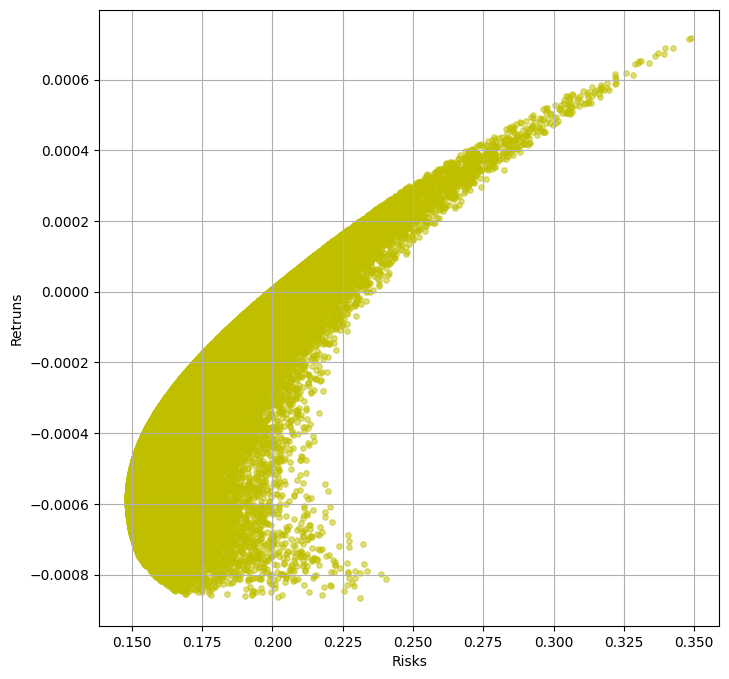

In [16]:
portfolios_v1.plot.scatter(x = 'Risks', y = 'Retruns', marker = 'o', color = 'y', s = 15, alpha = 0.5, grid = True, figsize = [8,8])

How many death, chaos, nature, and blood runes do we buy to make profit? 
- Not much profit can be made by making long term investments into runes. Especially considering the risk involved for each portfolio


Can we train/optimize to pick items that will yeild the highest return with minimal risk?

1) Watch the Andrej videos and reorganize data (for one Item) 
    nan | nan |        nan     | price on day 1 | price on day 2
    nan | nan | price on day 1 | price on day 2 | price on day 3 